In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.fashion_mnist.load_data()

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtrain[0].shape

(28, 28)

In [ ]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

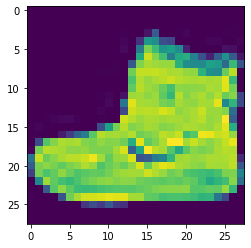

In [ ]:
plt.imshow(xtrain[0])

In [ ]:
ytrain.shape

(60000,)

In [ ]:
xtest.shape

(10000, 28, 28)

In [ ]:
xtest[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
ytest

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

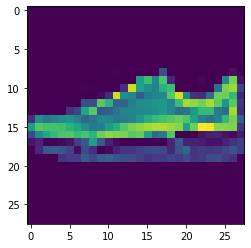

In [ ]:
plt.imshow(xtest[9])

In [ ]:
xtrain = xtrain/255
xtest  = xtest/255

In [ ]:
# model building

model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))

# add output layer
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(xtrain, ytrain, epochs = 4, validation_split = 0.2)

Epoch 1/4
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5165 - accuracy: 0.8150 - val_loss: 0.4215 - val_accuracy: 0.8496
Epoch 2/4
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3844 - accuracy: 0.8601 - val_loss: 0.3691 - val_accuracy: 0.8660
Epoch 3/4
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3441 - accuracy: 0.8731 - val_loss: 0.3627 - val_accuracy: 0.8662
Epoch 4/4
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3179 - accuracy: 0.8816 - val_loss: 0.3363 - val_accuracy: 0.8805


In [ ]:
yprob=model.predict(xtest)
yprob[0]


313/313 [==============================] - 1s 2ms/step


array([9.8123848e-05, 1.2610356e-05, 3.0464040e-05, 4.3143787e-06,
       1.1299426e-04, 6.3377484e-03, 7.2911283e-04, 6.7731164e-02,
       2.9188456e-04, 9.2465156e-01], dtype=float32)

In [ ]:
ypred=yprob.argmax(axis=1)
ypred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.78      0.72      0.75      1000
           3       0.89      0.86      0.88      1000
           4       0.70      0.87      0.78      1000
           5       0.98      0.94      0.96      1000
           6       0.74      0.61      0.67      1000
           7       0.92      0.96      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



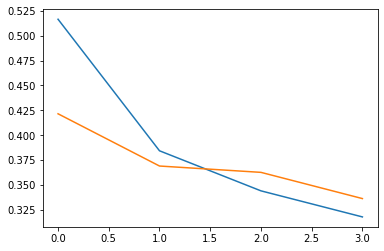

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])